In [1]:
# Course | PG DS- Data Science with Python
# Author: Bakul Purohit # Date: 3rd April 2021
# Project 2 | California Housing Price Prediction
# Domain : Finance and Housing|
# Source Data used: housing.xlsx

In [2]:
# Import all libraries

import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
from matplotlib import pyplot as plt


In [3]:
# Q 1| a--> Load the Data and Read the data file into the Program

house=pd.read_excel("housing.xlsx")

In [4]:
# Q 1| b --> Print first few rows of this data
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [5]:
# Q 1| c --> Extract Input (X) and output(Y) from the dataset


# --> First Convert data into a Dataframe
housing = pd.DataFrame(house)

# Since median_house_value is the ultimate Output, that becomes variable Y and rest all is considered as X

x = housing.drop(['median_house_value'],axis=1)
y = housing.median_house_value

In [6]:
# Quick check on X Variable content
x.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY


In [7]:
# Quick check on Y Variable content
y.head(2)

0    452600
1    358500
Name: median_house_value, dtype: int64

In [8]:
# Q 2--> Handle missing values
# Fill the missing values with the mean of the respective column.

In [9]:
#Step 1| Find which columns in dataset has missing values

housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [10]:
# Step 2 | Based on above analysis, total_bedrooms is the column header with missing values.
# Derive mean of bedroom Counts and store it in mean_berdroom_count

mean_bedroom_count=housing['total_bedrooms'].mean()
mean_bedroom_count

537.8705525375618

In [11]:
# Find missing instances of Bedroom data and replace with its mean

housing["total_bedrooms"] = np.where((housing['total_bedrooms'].isna()), mean_bedroom_count, housing.total_bedrooms)

In [12]:
# Step 3| Validate all missing values in the dataset are now replaced succesfully

In [13]:
housing.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [14]:
# Q 3--> Encode categorical data
# Convert categorical column in the dataset to numerical data.

In [15]:
# Step 1| Print information of this dataframe
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [16]:
# Step 2
# Based on Dataset information and also analysis of the Dataset Column Inputs given:
# ocean_proximity is the categorical

In [17]:
# make a new df with categorical as numerical columns
housing = pd.get_dummies(data = housing, columns= ['ocean_proximity'],drop_first=True)

In [18]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,1,0


In [19]:
# Q 4--> Split the dataset:Split the data into 80% training dataset and 20% test dataset.

In [20]:
# Step 1--> Import Train Test Split function for Sci Kit Learn

from sklearn.model_selection import train_test_split

In [21]:
# redefine x, y, because we have added some categorical to numerical conversions

x = housing.drop(['median_house_value'],axis=1)
y = housing.median_house_value

In [22]:
# Step 2 --> Split the Train and Test Data with the 80-20 proportion

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [23]:
print("Original Data Size: ", housing.shape)

Original Data Size:  (20640, 13)


In [24]:
# Validate Train Data is 80% of original Dataset
print("Train Data Size: ", x_train.shape)

Train Data Size:  (16512, 12)


In [25]:
# Validate Test Data is 20% of original Dataset
print("Test Data Size: ", x_test.shape)

Test Data Size:  (4128, 12)


In [26]:
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
12069,-117.55,33.83,6,502,76.000000,228,65,4.2386,1,0,0,0
15925,-122.44,37.73,52,2381,492.000000,1485,447,4.3898,0,0,1,0
11162,-118.00,33.83,26,1718,385.000000,1022,368,3.9333,0,0,0,0
4904,-118.26,34.01,38,697,208.000000,749,206,1.4653,0,0,0,0
4683,-118.36,34.08,52,2373,601.000000,1135,576,3.1765,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
13123,-121.26,38.27,20,1314,229.000000,712,219,4.4125,1,0,0,0
19648,-120.89,37.48,27,1118,195.000000,647,209,2.9135,1,0,0,0
9845,-121.90,36.58,31,1431,537.870553,704,393,3.1977,0,0,0,1
10799,-117.93,33.62,34,2125,498.000000,1052,468,5.6315,0,0,0,0


In [27]:
# Q 5--> Standardize data| Standardize training and test datasets.

from sklearn.preprocessing import StandardScaler
stdSC=StandardScaler()
stdSC.fit(x_train)
x_train_std=stdSC.transform(x_train)
x_test_std=stdSC.transform(x_test)

In [28]:
# Q 6--> Perform Linear Regression : 
# Perform Linear Regression on training data.
# Predict output for test dataset using the fitted model.
# Print root mean squared error (RMSE) from Linear Regression.


In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
# create an estimator object (Its job is to learn from the data)

houseModel=LinearRegression()

In [31]:
# Fit the Model
houseModel.fit(x_train_std,y_train)

LinearRegression()

In [32]:
#print slope values
houseModel.coef_

array([-53885.46840492, -54527.98744494,  13517.23094821,  -9383.62758367,
        28402.20799753, -44213.3895578 ,  29852.9318759 ,  73896.66913485,
       -17955.9920856 ,   2179.55724968,  -1352.89404805,   1870.26744648])

In [33]:
# print intercept or constant
houseModel.intercept_

207249.8958938948

In [34]:
# predict the model

y_predict = houseModel.predict(x_test_std)


In [35]:
# Print Train and Test Scores for this Linear Regression Model
print("Train Score: ", houseModel.score(x_train_std,y_train))
print("Test Score: ", houseModel.score(x_test_std,y_test))

Train Score:  0.6471730344800684
Test Score:  0.6381617983930402


In [36]:
from sklearn.metrics import mean_squared_error
from math import sqrt


In [37]:
# Derive RMSE (Below RMSE is calculated on y_train and y_predicted)
rmse = sqrt(mean_squared_error(y_test,y_predict))
print(rmse)

68689.2056170515


In [38]:
# Q 7--> Bonus exercise: Perform Linear Regression with one independent variable :

# Perform Linear Regression to predict housing values based on median_income.
# Predict output for test dataset using the fitted model.
# Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

In [39]:
# Extract just the median_income column from the independent variables (from X_train and X_test).
x_train_bonus = x_train[['median_income']]
x_test_bonus = x_test[['median_income']]


In [40]:
# create an estimator object (Its job is to learn from the data)
houseModel1=LinearRegression()


In [41]:
# Fit the Model
houseModel1.fit(x_train_bonus,y_train)


LinearRegression()

In [42]:
# predict the model

y1_predict = houseModel1.predict(x_test_bonus)

y1_predict

array([218829.83059812, 287249.80945645, 227105.96638704, ...,
       178937.09074405, 302549.52213887, 184397.07062714])

In [43]:
# Print Train and Test Scores for this Linear Regression Model
print("Train Score: ", houseModel1.score(x_train_bonus,y_train))
print("Test Score: ", houseModel1.score(x_test_bonus,y_test))

Train Score:  0.47991412719941506
Test Score:  0.44668468048959453


Text(0.5, 1.0, 'Fitted Vs Actual Model')

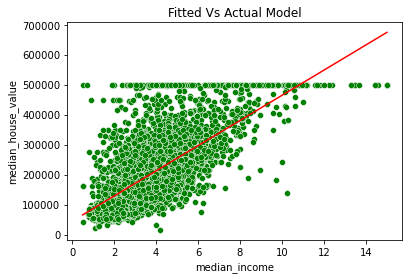

In [44]:

# Visualize Actual Data Vs Predicted

sns.lineplot(x=x_test_bonus.median_income,y=y1_predict,color="red")
sns.scatterplot(x=x_test_bonus.median_income,y=y_test,color="green")


plt.title("Fitted Vs Actual Model")
